# Final Data Processing Before Analysis

**INPUT: train_select (from the notebook, Select_Features)**

**OUTPUTS: train_final (for Python analysis) and train_final_R (for R analysis)**

This is the final data processing step before analyses.  At the end of the notebook, an output dataset called 'train_final' is created and will be used in the next notebook.  **You may run this entire notebook all at once.** Note that at the end of section 2 - Check Continuous Features, a dataset called, 'train_final_R', is created.  This file can be used for analysis in R.

The training data after Step 3 includes **56 variables** of which 49 are categorical and 7 are continuous (including "Id" and "SalePrice" ).  Note that the original training data included a total of 81 variables.  Other variables were excluded for reasons such as too many missing observations or can be substituted with other variables.  See the notebook, Select_Features, for more details.

The 5 continuous features are YearBuilt, TotalFlrSF, GrLivArea, TotRmsAbvGrd, and LotArea.  Note that TotalFlrSF will be dropped in this notebook so there will only be **4 continuous features** left.

The **49 categorical features** are listed below (see Create Dummies for Categorical Features).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### NOTE: "Id" gets dropped here (so 55 variables left at this point):

In [2]:
df = pd.read_pickle('./Data/train_select')
df.drop('Id',axis=1,inplace=True)
m = df.shape[0]

In [3]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,...,ScreenPorch,Fence,YrSold,SaleType,SaleCondition,SalePrice,Quadrant,Remodel,TotFlrSF,NumBaths
0,NotPUD,RLZone,8450,RegShape,Level,Inside,GntlSlope,NCond1,1FamBldgType,2.0Story,...,NScrnPorch,NFence,2008,ConvSale,NormSale,208500,Quad3,NRemod,1710,3+ Bath
1,NotPUD,RLZone,9600,RegShape,Level,OthLotCnfg,GntlSlope,ANCond1,1FamBldgType,1.0Story,...,NScrnPorch,NFence,2007,ConvSale,NormSale,181500,Quad2,NRemod,1262,2.5 Bath
2,NotPUD,RLZone,11250,NRegShape,Level,Inside,GntlSlope,NCond1,1FamBldgType,2.0Story,...,NScrnPorch,NFence,2008,ConvSale,NormSale,223500,Quad3,Remod,1786,3+ Bath
3,NotPUD,RLZone,9550,NRegShape,Level,Corner,GntlSlope,NCond1,1FamBldgType,2.0Story,...,NScrnPorch,NFence,2006,ConvSale,ANormSale,140000,Quad3,Remod,1717,2 Bath
4,NotPUD,RLZone,14260,NRegShape,Level,OthLotCnfg,GntlSlope,NCond1,1FamBldgType,2.0Story,...,NScrnPorch,NFence,2008,ConvSale,NormSale,250000,Quad1,NRemod,2198,3+ Bath


In [4]:
df.shape

(1460, 55)

Here, we check the (a) response variable, SalePrice, (b) continunous features, and (c) categorical features.  In (a) and (b), we decide whether transformations may be needed and in (c) we convert the categorical features into dummy variables to facilitate analysis.

## 1 - Check Continuous Response (SalePrice)

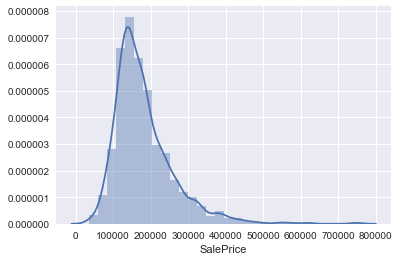

In [5]:
sns.distplot(df['SalePrice'], bins=30);

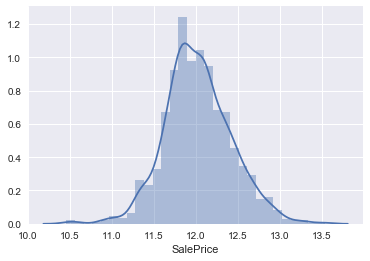

In [6]:
sns.distplot(df['SalePrice'].apply(lambda x: np.log(x)), bins=30);

In [7]:
# Log-transform SalePrice: 
df['logSalePrice'] = df['SalePrice'].apply(lambda x: np.log(x))
df.drop('SalePrice',axis=1,inplace=True)

## 2 - Check Continuous Features

In [8]:
df.describe()

,LotArea,YearBuilt,GrLivArea,TotRmsAbvGrd,TotFlrSF,logSalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1515.463699,6.517808,1509.619178,12.024051
std,9981.264932,30.202904,525.480383,1.625393,521.163523,0.399452
min,1300.000000,1872.000000,334.000000,2.000000,334.000000,10.460242
25%,7553.500000,1954.000000,1129.500000,5.000000,1123.750000,11.775097
50%,9478.500000,1973.000000,1464.000000,6.000000,1458.000000,12.001505
75%,11601.500000,2000.000000,1776.750000,7.000000,1775.250000,12.273731
max,215245.000000,2010.000000,5642.000000,14.000000,5642.000000,13.534473


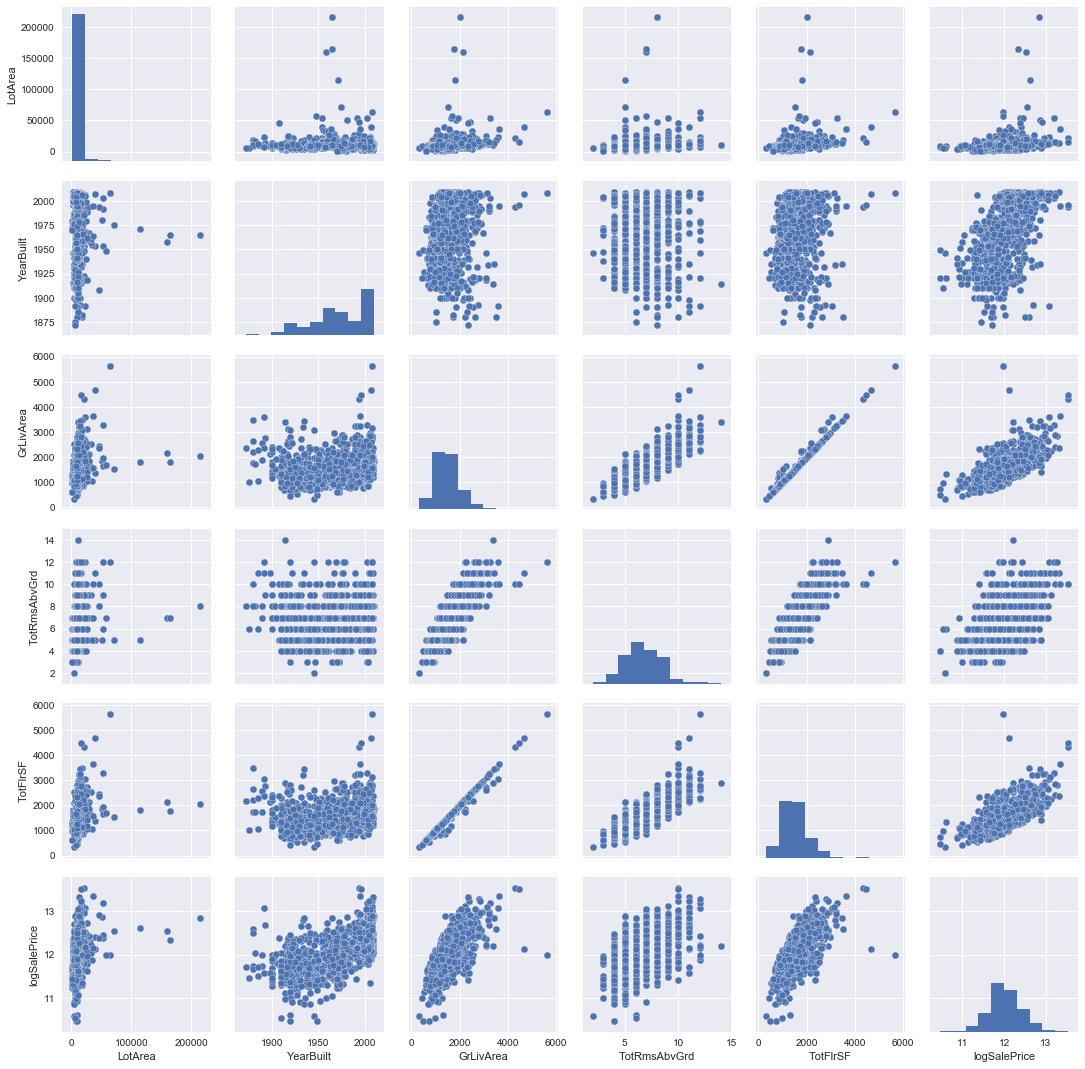

In [9]:
cont_feat = ['LotArea','YearBuilt','GrLivArea','TotRmsAbvGrd','TotFlrSF','logSalePrice']
sns.pairplot(df[cont_feat]);

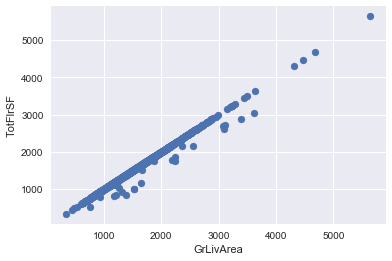

In [10]:
#These features appear to be highly collinear!
plt.scatter(df['GrLivArea'],df['TotFlrSF']);
plt.xlabel('GrLivArea');
plt.ylabel('TotFlrSF');

In [11]:
#Exclude TotFlrSF and use GrLivArea only; note that TotFlrSF was calculated in Step 2
df.drop('TotFlrSF',axis=1,inplace=True)

In [12]:
# Log-transform continuous features (except YearBuilt, and TotRmsAbvGrd):
df['logGrLivArea'] = df['GrLivArea'].apply(lambda x: np.log(x))
df.drop('GrLivArea',axis=1,inplace=True)

df['logLotArea'] = df['LotArea'].apply(lambda x: np.log(x))
df.drop('LotArea',axis=1,inplace=True)

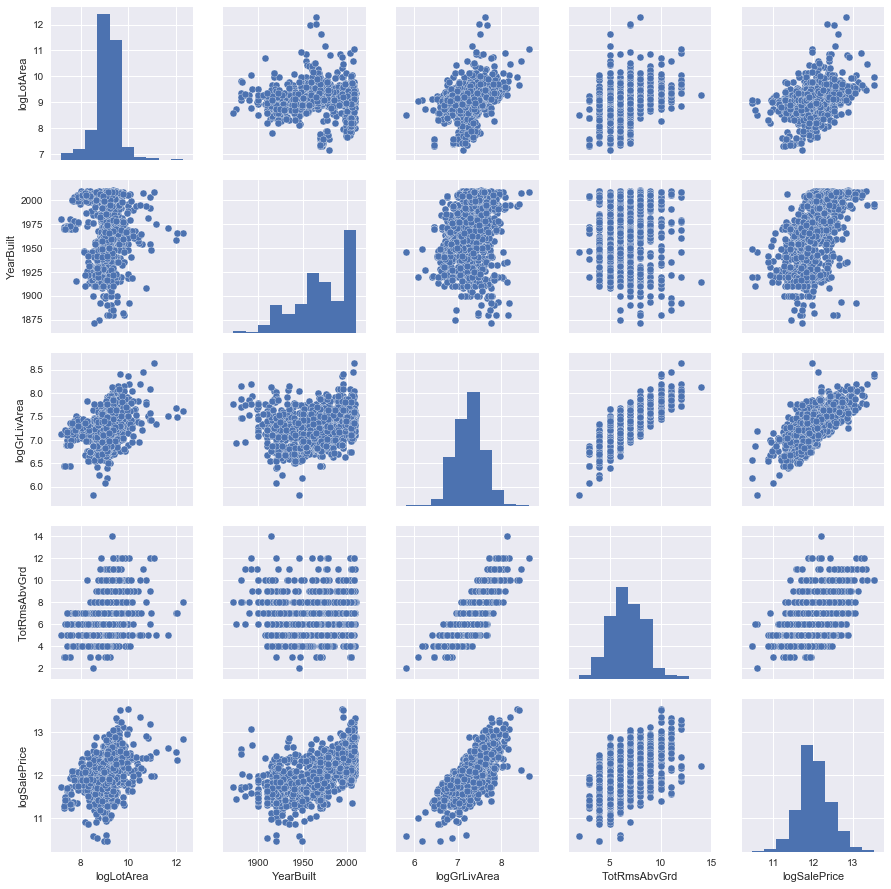

In [13]:
cont_feat_final = ['logLotArea','YearBuilt','logGrLivArea','TotRmsAbvGrd','logSalePrice']
sns.pairplot(df[cont_feat_final]);

Note that there are **4 continuous fatures**

### Save data for analysis using R

In [14]:
#File for R
df.to_csv('train_final_R', sep='\t')

## 3 -  Create Dummies for Categorical Features

In [15]:
mylist = ['MSSubClass','BldgType','HouseStyle','MSZoning','Quadrant','Condition1','Remodel','YrSold','SaleType',
         'SaleCondition','HeatingQC','CentralAir','Electrical','OverallQual','OverallCond','Functional','TotalBsmtSF','BsmtQual',
         'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','NumBaths','BedroomAbvGr','KitchenAbvGr',
         'KitchenQual','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond',
         'PavedDrive','RoofStyle','Exterior1st','MasVnrType','ExterQual','ExterCond','Foundation','LotConfig',
         'LandSlope','LotShape','LandContour','Fence','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch',]

In [16]:
len(mylist)

49

Note that there are **49 categorical features**

In [17]:
cols = pd.Series(data=mylist)
cols_low = cols.apply(lambda x: x.lower())
cols_dummies = cols_low.copy()
n_cols = len(cols)

In [18]:
for i in range(n_cols):
    cols_dummies[i] = pd.get_dummies(df[cols[i]],drop_first=True)

In [19]:
df.drop(mylist,axis=1,inplace=True)

In [20]:
for i in range(n_cols):
    df = pd.concat([df,cols_dummies[i]],axis=1)

## 4 - Save Final Data

In [21]:
df.to_pickle('./Data/train_final')